In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
two_epochs = False # if True, observe each target twice; if False, observe once

In [3]:
targets = np.genfromtxt('ollie_proposal_sample.txt', names=['HD', 'HIP', 'starname','RA', 'DEC', 'Gmag', 'BPRP'], 
                        skip_header=2, dtype=None, encoding=None)

In [4]:
targets = targets[targets['BPRP'] > 0.6]

In [20]:
len(targets)

174

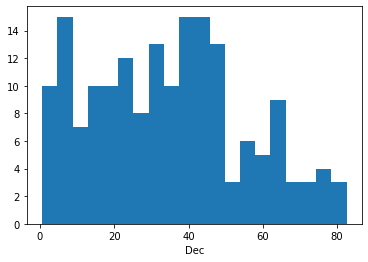

In [5]:
plt.hist(targets['DEC'], bins=20)
plt.xlabel('Dec');

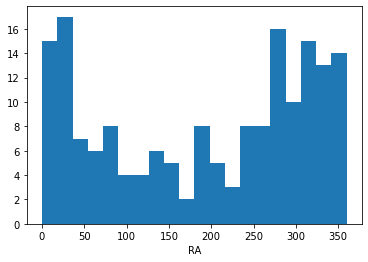

In [6]:
plt.hist(targets['RA'], bins=20)
plt.xlabel('RA');

Distribution is fairly even so I'm going to ignore semester constraints right now.

In [7]:
vmags = targets['Gmag'] + 0.5 # this is a hack but Annelies's detailed comparison validates it

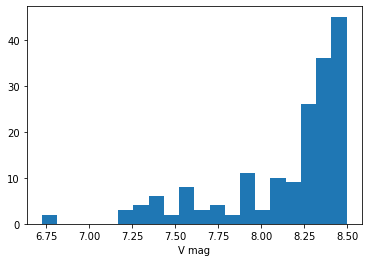

In [8]:
plt.hist(vmags, bins=20)
plt.xlabel('V mag');

Calculate a scaling factor on the exposure time.
We use the fact that the flux of a star with magnitude $V = 8$ compared to a star of magnitude $m_V$ is a factor of $10^{0.4(m_V - 8)}$ brighter:

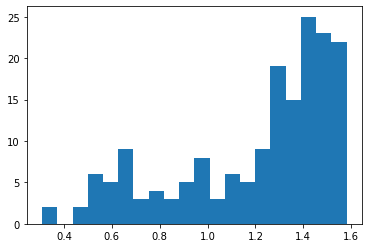

In [9]:
flux_scaling = 10.**(0.4 * (vmags - 8.0))
plt.hist(flux_scaling, bins=20);

Plus the standard stars to be observed by all instruments (these are selected to be bright so they'll be quick):

In [10]:
standards = np.genfromtxt('gaia-brewer-overlap-standards.csv', delimiter=',', names=True, dtype=None, encoding=None)

In [11]:
standards['Gmag']

array([4.9697, 5.0824, 5.1628, 5.1759, 5.1797, 5.3678, 5.3827, 5.4294,
       5.4415, 5.4796])

In [12]:
flux_scaling_standards = 10.**(0.4 * (standards['Gmag'] + 0.5 - 8.0))

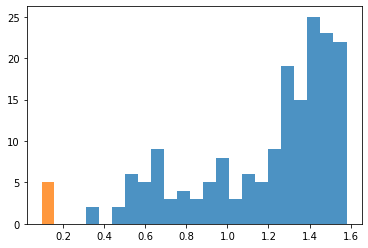

In [13]:
flux_scaling = 10.**(0.4 * (vmags - 8.0))
plt.hist(flux_scaling, bins=20, alpha=0.8)
plt.hist(flux_scaling_standards, bins=2, alpha=0.8);

#### FIES time:

Select a randomized subset of 1/3rd of the target list:

In [14]:
np.random.shuffle(flux_scaling)
N = len(targets)
subset = flux_scaling[0:int(N/3)]

In [15]:
if two_epochs:
    subset = np.append(subset, subset) # we want two observations per star so double the list
subset = np.append(subset, flux_scaling_standards) # just one obs of each standard star

Calculate the required integration time:

In [16]:
v8_exptime = 30. * 60. # seconds to get to SNR ~ 200 at 600nm for V=8
total_exptime = np.sum(v8_exptime * subset)

Add on overheads for readout + slew:

In [17]:
readout_time = 90.
slew_time = 120. # ???
total_time = total_exptime + len(subset) * (readout_time + slew_time)

In [18]:
print("time required is {0:.2f} hours or {1:.1f} 8-hour nights".format(total_time/3600., total_time/3600./8.))

time required is 39.18 hours or 4.9 8-hour nights


#### HARPS-N time:

In [21]:
subset = flux_scaling[int(N/3):2*int(N/3)]
if two_epochs:
    subset = np.append(subset, subset) # we want two observations per star so double the list
subset = np.append(subset, flux_scaling_standards) # just one obs of each standard star

In [22]:
v8_exptime = 15. * 60. # seconds to get to SNR ~ 200 at 600nm for V=8
total_exptime = np.sum(v8_exptime * subset)

In [23]:
readout_time = 150.
slew_time = 120. # ???
total_time = total_exptime + len(subset) * (readout_time + slew_time)

In [24]:
print("time required is {0:.2f} hours or {1:.1f} 8-hour nights".format(total_time/3600., total_time/3600./8.))

time required is 22.76 hours or 2.8 8-hour nights


#### HERMES time:

(Note that due to rounding in the 1/3rd sample, HERMES might get 1-2 more targets than the other spectrographs)

In [25]:
subset = flux_scaling[2*int(N/3):]
if two_epochs:
    subset = np.append(subset, subset) # we want two observations per star so double the list
subset = np.append(subset, flux_scaling_standards) # just one obs of each standard star

In [26]:
v8_exptime = 25. * 60. # seconds to get to SNR ~ 200 at 600nm for V=8
total_exptime = np.sum(v8_exptime * subset)

In [27]:
readout_time = 150. # CHECK THIS
slew_time = 120. # ???
total_time = total_exptime + len(subset) * (readout_time + slew_time)

In [28]:
print("time required is {0:.2f} hours or {1:.1f} 8-hour nights".format(total_time/3600., total_time/3600./8.))

time required is 34.97 hours or 4.4 8-hour nights


We should *round up* on HERMES time because it needs middle-of-night calibrations (advised by instrument team).

##### Note: you can double-check the stability of the calculations by re-running all cells from the "FIES time" section down. This will shuffle the targets to different instruments.
The conclusions remain quite stable to within an hour or two.

#### HIRES:

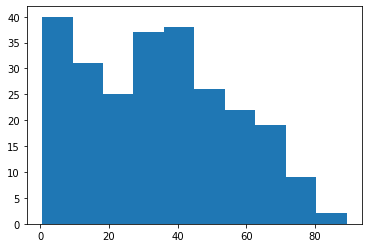

In [26]:
plt.hist(targets['DEC']);

In [27]:
subset = flux_scaling[(targets['DEC'] >= 15.) & (targets['DEC'] <= 60.)]

In [28]:
if two_epochs:
    subset = np.append(subset, subset) # we want two observations per star so double the list
subset = np.append(subset, flux_scaling_standards) # just one obs of each standard star

In [29]:
v8_exptime = 10. * 60. # seconds to get to SNR ~ 200 at 600nm for V=8 - CHECK THIS
total_exptime = np.sum(v8_exptime * subset)

In [30]:
readout_time = 150. # CHECK THIS
slew_time = 120. # ???
total_time = total_exptime + len(subset) * (readout_time + slew_time)

In [31]:
print("time required is {0:.2f} hours or {1:.1f} 8-hour nights".format(total_time/3600., total_time/3600./8.))

time required is 44.12 hours or 5.5 8-hour nights


can this be done in full-night increments?

### HERMES Spanish time sample:

In [32]:
targets2 = np.genfromtxt('ollie_mercator_sample.txt', names=['Name', 'RA', 'DEC','PMRA', 'PMDEC', 'Gmag'], 
                        skip_header=20, dtype=None, encoding=None)

In [33]:
standards2 = np.genfromtxt('ollie_mercator_sample.txt', names=['HD', 'HIP', 'starname','RA', 'DEC', 'Gmag', 'BPRP'], 
                        skip_header=7, skip_footer=117, dtype=None, encoding=None)

In [34]:
vmags2 = targets2['Gmag'] + 0.5 # this is a hack but Annelies's detailed comparison validates it
vmags2 = np.append(vmags2, standards['Gmag'] + 0.5)

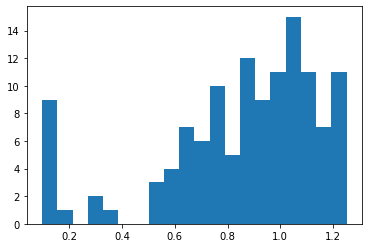

In [35]:
flux_scaling2 = 10.**(0.4 * (vmags2 - 8.0))
plt.hist(flux_scaling2, bins=20);

In [36]:
v8_exptime = 25. * 60. # seconds to get to SNR ~ 200 at 600nm for V=8
total_exptime = np.sum(v8_exptime * flux_scaling2)

In [37]:
readout_time = 150. # CHECK THIS
slew_time = 120. # ???
total_time = total_exptime + len(targets2) * (readout_time + slew_time)

In [38]:
print("time required is {0:.2f} hours or {1:.1f} 8-hour nights".format(total_time/3600., total_time/3600./8.))

time required is 52.60 hours or 6.6 8-hour nights
